### La tarea se encuentra al final

## Nombre: Eliazar Noa Llasccanoa
## Codigo:  193003

## **Universidad Nacional de San Antonio Abad del Cusco**
### Departamento Académico de Informática
## DEEP LEARNING

### Tarea Práctica Nº 07

### **Redes Neuronales Convolucionales**




### **1.	OBJETIVO.**

* Comprender el funcionamiento de una Red Neuronal Convolucional.
* Implementar una Red Neuronal Convolucional utilizando la librería Numpy.

### **2.	IMPLEMENTACIÓN DE LA RED NEURONAL CONVOLUCIONAL**

> La red neuronal convolucional (CNN) es la técnica más avanzada para analizar señales multidimensionales como imágenes. Hay diferentes bibliotecas que ya implementan CNN, como TensorFlow y Keras. Dichas bibliotecas aíslan al desarrollador de algunos detalles y solo brindan una API abstracta para facilitar la vida y evitar la complejidad en la implementación. Pero en la práctica, esos detalles pueden marcar la diferencia. A veces, el científico de datos tiene que revisar esos detalles para mejorar el rendimiento. La solución en tal situación es construir cada pieza de ese modelo por su cuenta. Esto proporciona el mayor nivel posible de control sobre la red. Además, se recomienda implementar dichos modelos para tener una mejor comprensión sobre ellos.

>En esta práctica, se crea una CNN utilizando solo la biblioteca NumPy. Solo se crean tres capas que son convolución (conv para abreviar), ReLU y agrupación máxima. Los principales pasos involucrados son los siguientes:

>1.	Lectura de la imagen de entrada.
2.	Preparando filtros.
3.	Capa de convolución: convolución de cada filtro con la imagen de entrada.
4.	Capa ReLU: aplicación de la función de activación de ReLU en los mapas de características (salida de la capa conv).
5.	Capa Max Pooling: aplicación de la operación de agrupación en la salida de la capa ReLU.
6.	Apilamiento de capas de conv, ReLU y agrupación máxima.






>>### **1.	Lectura de la imagen de entrada**

>>El siguiente código lee una imagen ya existente de la biblioteca Python de skimage y la convierte en escala de grises.

In [2]:
import numpy
import skimage.data # Imagenes de ejemplos
from skimage import io
# Lectura de la imagen
img = skimage.data.chelsea()
# Convertir la imagen a escala de grises.
img = skimage.color.rgb2gray(img)


>>Leer la imagen es el primer paso porque los próximos pasos dependen del tamaño de entrada. La imagen después de convertirse en gris se muestra a continuación.

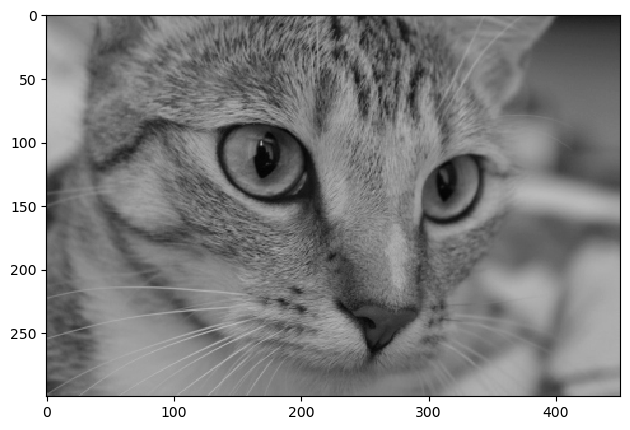

(300, 451)
300
451


In [3]:
io.imshow(img) # mostrar la imagen
io.show()
# imprimir la forma de la imagen
print (img.shape)
print (img.shape[0]) # filas 
print(img.shape[1]) # columnas

>>### **2.	Preparación de Filtros**

>>El siguiente código prepara el banco de filtros para la primera capa de convolución (l1 para abreviar):

>>l1_filter = numpy.zeros((2,3,3))

>>Se crean 2 filtros de tamaño 3x3, por eso la matriz cero es de tamaño(2=num_filters, 3=num_rows_filter, 3=num_columns_filter). El tamaño del filtro se selecciona para que sea una matriz 2D sin profundidad porque la imagen de entrada es gris y no tiene profundidad (es decir, 2D). Si la imagen es RGB con 3 canales, el tamaño del filtro debe ser (3, 3, 3=profundidad).

>>El tamaño del banco de filtros está especificado por la matriz anterior inicializado a cero. Es posible sobreescribir dichos valores de la siguiente manera para detectar bordes verticales y horizontales.

>>l1_filter[0, :, :] = numpy.array([[[-1, 0, 1],   
                                     [-1, 0, 1],   
                                     [-1, 0, 1]]])  
>>l1_filter[1, :, :] = numpy.array([[[1,   1,  1],   
                                     [0,   0,  0],   
                                     [-1, -1, -1]]])


In [4]:
# Creación del banco de filtros
# 2 filtros de 3 x 3
l1_filter = numpy.zeros((2,3,3))
# Definición de los filtros para detectar bordes 
# verticales y horizontales

l1_filter[0, :, :] = numpy.array([[[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = numpy.array([[[1,   1,  1],
                                   [0,   0,  0],
                                   [-1, -1, -1]]])


>>### **3.	Capa Convolucional**

>>Después de preparar los filtros, lo siguiente es convolucionar la imagen de entrada con ellos. La siguiente línea convoluciona la imagen con el banco de filtros usando una función llamada conv:

>>*l1_feature_map = conv(img, l1_filter)*

>>Dicha función acepta solo dos argumentos que son la imagen y el banco de filtros que se implementa como se muestra a continuación


In [5]:
'''Esta funcion realiza la convolución de una imagen de 
entrada con un banco de filtros.'''
import numpy
import sys
def conv(img, conv_filter):
     # Comprobaciones de dimensiones y formas de los filtros y la imagen
    if len(img.shape) != len(conv_filter.shape) - 1: # Comprobar si el número de dimensiones es el mismo
        print("Error: El número de dimensiones en el filtro de conversión y la imagen no coinciden.")
        exit()
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Compruebe si el nro de canales de imagen
                                                         # coincide con la profundidad del filtro.
        if img.shape[-1] != conv_filter.shape[-1]:
            print("Error: El número de canales tanto en la imagen como en el filtro debe coincidir.")
            sys.exit()
    if conv_filter.shape[1] != conv_filter.shape[2]: # Compruebe si las dimensiones del filtro son iguales.
        print('Error: El filtro debe ser una matriz cuadrada. Es decir. el número de filas y columnas debe coincidir.')
        sys.exit()
    if conv_filter.shape[1]%2==0: # Compruebe si las dimensiones del filtro son impares.
        print('Error: El filtro debe tener un tamaño impar. Es decir. número de filas y columnas debe ser impar.')
        sys.exit()

    # crea mapa de características vacío para contener el resultado de la convolución de los filtros con la imagen.
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1,
                                img.shape[1]-conv_filter.shape[1]+1,
                                conv_filter.shape[0]))

    # Convolución de la imagen por el(los) filtro(s).
    for filter_num in range(conv_filter.shape[0]):
        print("Filtro ", filter_num + 1)
        curr_filter = conv_filter[filter_num, :] # obtener un filtro del banco.
        """
         Comprobando si hay múltiples canales para el filtro único.
         Si es así, cada canal convolucionará la imagen.
         El resultado de todas las convoluciones se suma para devolver un solo mapa de características.
        """
        if len(curr_filter.shape) > 2:
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Matriz que contiene la suma de todos los
                                                                 # mapas de características.
            for ch_num in range(1, curr_filter.shape[-1]): # Convolucionando cada canal con la imagen y
                                                           # sumando los resultados.
                conv_map = conv_map + conv_(img[:, :, ch_num], curr_filter[:, :, ch_num])
        else: # Solo hay un canal en el filtro.
            conv_map = conv_(img, curr_filter)
        feature_maps[:, :, filter_num] = conv_map # Sosteniendo el mapa de características con el filtro
                                                  # actual.
    #print(len(img.shape))
    #print(len(conv_filter.shape) - 1)
    #print(img.shape[-1])
    #print(conv_filter.shape[1])
    #print(conv_filter.shape[2])
    return feature_maps # Devolver todos los mapas de características.



>>Puede notar que la convolución se aplica mediante una función llamada conv_ que es diferente de la función conv. La función conv solo acepta la imagen de entrada y el banco de filtros, pero no aplica su propia convolución. Simplemente pasa cada conjunto de pares de filtros de entrada para convolucionar a la función conv_. Esto es solo para simplificar la investigación del código. Aquí está la implementación de la función conv_:

In [6]:
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[1]
    result = numpy.zeros((img.shape))
    # Recorriendo la imagen para aplicar la operación de convolución.
    for r in numpy.uint16(numpy.arange(filter_size/2.0,
                          img.shape[0]-filter_size/2.0+1)):
        for c in numpy.uint16(numpy.arange(filter_size/2.0,
                                           img.shape[1]-filter_size/2.0+1)):
            """
            Conseguir que la región actual se multiplique con el filtro.
            Cómo recorrer la imagen y obtener la región basada en
            el tamaño de la imagen y el archivo es la parte más complicada de la convolución.
            """
            curr_region = img[r-numpy.uint16 (numpy.floor(filter_size/2.0)):
                          r+numpy.uint16(numpy.ceil(filter_size/2.0)),
                          c-numpy.uint16(numpy.floor(filter_size/2.0)):
                          c+numpy.uint16(numpy.ceil(filter_size/2.0))]
            # Multiplicación por elementos entre la región actual y el filtro.
            curr_result = curr_region * conv_filter
            conv_sum = numpy.sum(curr_result) # Sumando el resultado de la multiplicación.
            result[r, c] = conv_sum # Guardar la suma en el mapa de características de la capa de convolución.

    #Recortar los valores atípicos de la matriz de resultados.
    final_result = result[numpy.uint16(filter_size/2.0):result.shape[0]-numpy.uint16(filter_size/2.0),
                          numpy.uint16(filter_size/2.0):result.shape[1]-numpy.uint16(filter_size/2.0)]
    return final_result


In [7]:
l1_feature_map = conv(img, l1_filter)

Filtro  1


Filtro  2


>>Después de convolucionar cada filtro por la entrada, la función conv devuelve los mapas de características.

In [8]:
print(l1_feature_map)

[[[-3.33447059e-02 -5.99694118e-02]
  [-3.33447059e-02 -5.01541176e-02]
  [-5.60313725e-03 -4.65003922e-02]
  ...
  [-1.87141176e-02 -1.26356863e-02]
  [-8.92156863e-03 -1.79333333e-02]
  [ 1.17647059e-02 -3.10741176e-02]]

 [[-4.11878431e-02 -6.27898039e-02]
  [-3.33447059e-02 -6.27898039e-02]
  [-9.80745098e-03 -6.25070588e-02]
  ...
  [-1.45325490e-02 -2.55313725e-02]
  [ 3.10313725e-03 -3.25105882e-02]
  [ 1.62517647e-02 -3.53082353e-02]]

 [[-4.17533333e-02 -5.88533333e-02]
  [-2.99886275e-02 -6.02600000e-02]
  [-1.40117647e-02 -5.91439216e-02]
  ...
  [-1.42725490e-02 -5.23870588e-02]
  [ 5.33529412e-03 -5.37937255e-02]
  [ 1.62517647e-02 -4.73572549e-02]]

 ...

 [[ 2.02529804e-01 -3.41420784e-01]
  [ 2.32763529e-01 -4.66896078e-01]
  [ 1.57650588e-01 -4.14516863e-01]
  ...
  [-5.86313725e-03  1.07892157e-01]
  [ 1.98000000e-03  1.02058824e-01]
  [-3.92156863e-03  1.00147059e-01]]

 [[ 2.11474118e-01 -5.72912157e-01]
  [ 1.44784706e-01 -3.92787843e-01]
  [ 1.73301961e-02 -9.8402

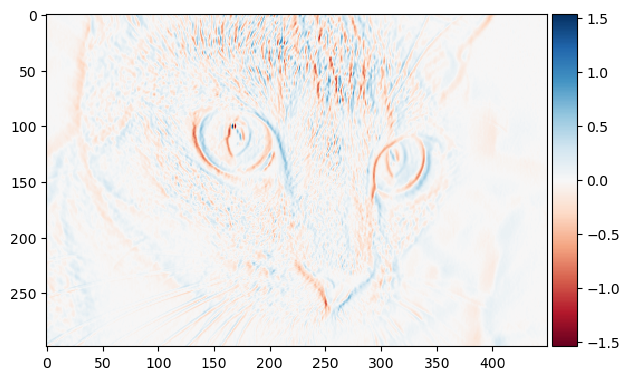

In [9]:
io.imshow(l1_feature_map[:,:,0])

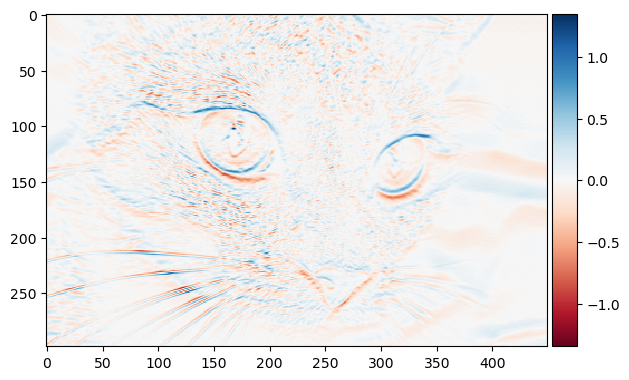

In [10]:
io.imshow(l1_feature_map[:,:,1])

>>La salida de esta capa es entrada a la capa ReLU

>>### **4.	Capa ReLU**

>>La capa ReLU aplica la función de activación de ReLU sobre cada mapa de características devuelto por la capa conv. Se llama usando la función relu según la siguiente línea de código:

>>l1_feature_map_relu = relu(l1_feature_map)

>>La función relu se implementa de la siguiente manera:


In [11]:
def relu(feature_map):
    #Preparando la salida de la función de activación ReLU.
    relu_out = numpy.zeros(feature_map.shape)
    for map_num in range(feature_map.shape[-1]):
        for r in numpy.arange(0,feature_map.shape[0]):
            for c in numpy.arange(0, feature_map.shape[1]):
                relu_out[r, c, map_num] = numpy.max([feature_map[r, c, map_num], 0])
    return relu_out


In [12]:
l1_feature_map_relu = relu(l1_feature_map)

>>Es muy simple. Simplemente recorra cada elemento en el mapa de características y devuelva el valor original en el mapa de características si es mayor que 0. De lo contrario, devuelva 0. Los resultados se muestran en las siguientes figuras

In [13]:
print(l1_feature_map_relu)

[[[0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [1.17647059e-02 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00]
  [3.10313725e-03 0.00000000e+00]
  [1.62517647e-02 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00]
  [5.33529412e-03 0.00000000e+00]
  [1.62517647e-02 0.00000000e+00]]

 ...

 [[2.02529804e-01 0.00000000e+00]
  [2.32763529e-01 0.00000000e+00]
  [1.57650588e-01 0.00000000e+00]
  ...
  [0.00000000e+00 1.07892157e-01]
  [1.98000000e-03 1.02058824e-01]
  [0.00000000e+00 1.00147059e-01]]

 [[2.11474118e-01 0.00000000e+00]
  [1.44784706e-01 0.00000000e+00]
  [1.73301961e-02 0.00000000e+00]
  ...
  [1.10901961e-03 1.00033333e-01]
  [5

c:\Users\HP\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


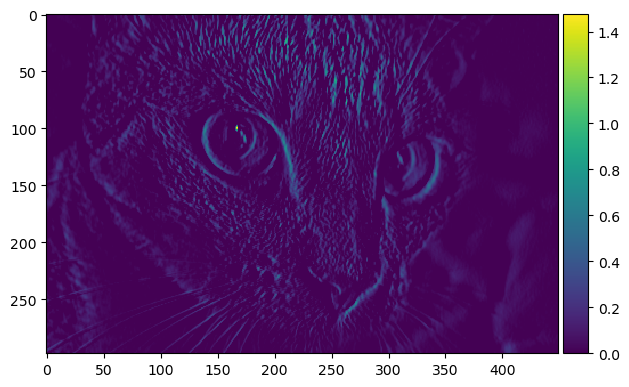

In [14]:
io.imshow(l1_feature_map_relu[:,:,0])

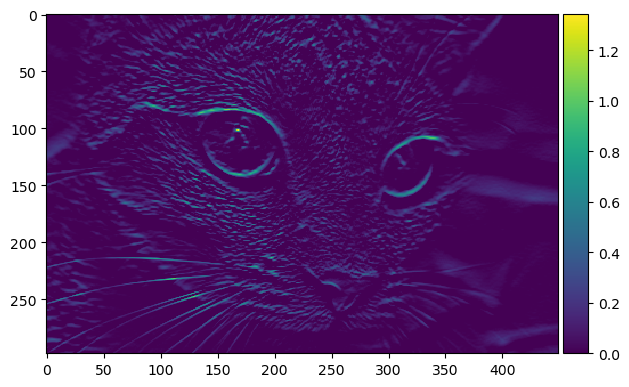

In [15]:
io.imshow(l1_feature_map_relu[:,:,1])

>>### **5.	Capa de agrupación máxima**

>>La capa de agrupación máxima acepta la salida de la capa ReLU y aplica la operación de agrupación máxima de acuerdo con la siguiente línea:

>>l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)

>>Se implementa utilizando la función de agrupación de la siguiente manera:



In [16]:
def pooling(feature_map, size=2, stride=2):
    #Preparación de la salida de la operación de agrupación.
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride+1),
                            numpy.uint16((feature_map.shape[1]-size+1)/stride+1),
                            feature_map.shape[-1]))
    for map_num in range(feature_map.shape[-1]):
        r2 = 0
        for r in numpy.arange(0,feature_map.shape[0]-size+1, stride):
            c2 = 0
            for c in numpy.arange(0, feature_map.shape[1]-size+1, stride):
                pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])
                c2 = c2 + 1
            r2 = r2 +1
    return pool_out


In [17]:
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)

>>La función acepta tres entradas que son la salida de la capa ReLU, el tamaño de la máscara de agrupación y el salto (stride). Simplemente crea una matriz vacía, como la anterior, que contiene la salida de dicha capa. El tamaño de dicha matriz se especifica de acuerdo con los argumentos de tamaño y stride como en dicha línea:

>>pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride+1),
                        numpy.uint16((feature_map.shape[1]-size+1)/stride+1),
                        feature_map.shape[-1]))

>>Luego recorre la entrada, canal por canal de acuerdo con el bucle externo que usa la variable de bucle map_num. Para cada canal en la entrada, se aplica la operación de agrupación máxima. De acuerdo con el paso y el tamaño utilizados, la región se recorta y el máximo se devuelve en la matriz de salida de acuerdo con esta línea:


>>pool_out[r2, c2, map_num] = numpy.max([feature_map[r:r+size,  c:c+size, map_num]])

>>Las salidas de dicha capa de agrupación se muestran en la siguiente figura. Tenga en cuenta que el tamaño de la salida de la capa de agrupación es más pequeño que su entrada, incluso si parecen idénticos en sus gráficos.

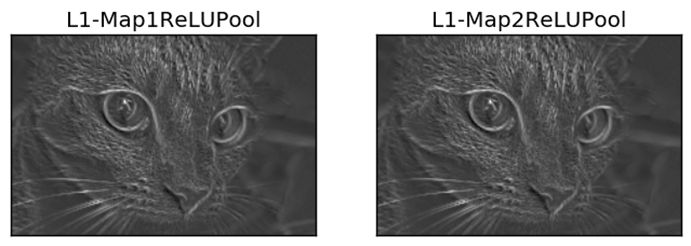




>>### **6.	Apilando Capas**

>>Hasta este punto, la arquitectura CNN con capas de conv, ReLU y max pooling está completa. Puede haber otras capas para apilar además de las anteriores, como se muestra a continuación.

In [18]:
# Segunda capa conv
l2_filter = numpy.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 2**")
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
print("\n**ReLU**")
l2_feature_map_relu = relu(l2_feature_map)
print("\n**Pooling**")
l2_feature_map_relu_pool =pooling(l2_feature_map_relu, 2, 2)
print("**End of conv layer 2**\n")




**Working with conv layer 2**
Filtro  1
Filtro  2
Filtro  3

**ReLU**

**Pooling**
**End of conv layer 2**



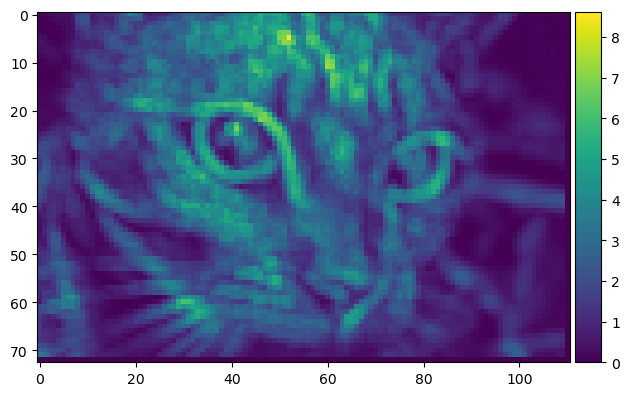

In [19]:
io.imshow(l2_feature_map_relu_pool[:,:,1])

## **3. TAREA**

>Modifique el programa para agregar una tercera capa convolucional con 2 filtros de 7 x 7 y mostrar las imagenes de cada capa

Filtro  1
Filtro  2
Filtro  1
Filtro  2
Filtro  3
Filtro  1
Filtro  2


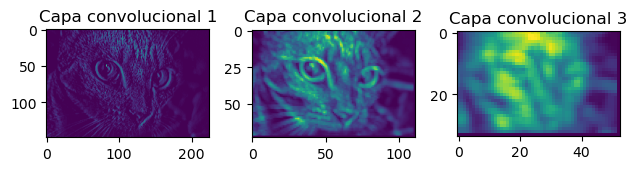

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data # Imagenes de ejemplos
from skimage import io

# Lectura de la imagen
img = skimage.data.chelsea()
# Convertir la imagen a escala de grises.
img = skimage.color.rgb2gray(img)

# Creación del banco de filtros
# 2 filtros de 3 x 3
l1_filter = numpy.zeros((2,3,3))
# Definición de los filtros para detectar bordes 
# verticales y horizontales

l1_filter[0, :, :] = numpy.array([[[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = numpy.array([[[1,   1,  1],
                                   [0,   0,  0],
                                   [-1, -1, -1]]])
# Primera capa convolucional

l1_feature_map = conv(img, l1_filter)
l1_feature_map_relu = relu(l1_feature_map)
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)

# Segunda capa convolucional
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)
l2_feature_map_relu = relu(l2_feature_map)
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

# Tercera capa convolucional
l3_filter = np.random.rand(2, 7, 7, l2_feature_map_relu_pool.shape[-1])
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
l3_feature_map_relu = relu(l3_feature_map)
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)

# Mostrar las imágenes de cada capa
plt.subplot(1, 3, 1)
plt.imshow(l1_feature_map_relu_pool[:, :, 0])
plt.title('Capa convolucional 1')

plt.subplot(1, 3, 2)
plt.imshow(l2_feature_map_relu_pool[:, :, 0])
plt.title('Capa convolucional 2')

plt.subplot(1, 3, 3)
plt.imshow(l3_feature_map_relu_pool[:, :, 0])
plt.title('Capa convolucional 3')

plt.tight_layout()
plt.show()


### EXPLICACION

Este código implementa una arquitectura de red neuronal convolucional (CNN) con tres capas convolucionales. A continuación, se describen las partes clave del código:

- Se lee una imagen de ejemplo y se convierte a escala de grises.
- Se definen los filtros para la primera capa convolucional. En este caso, se utilizan dos filtros: uno para detectar bordes verticales y otro para detectar bordes horizontales.
- Se aplica la primera capa convolucional a la imagen de entrada, seguida de la función de activación ReLU y la operación de agrupación máxima.
- Se repite el proceso para la segunda y tercera capa convolucional, utilizando filtros aleatorios en la segunda capa y filtros aleatorios en la terca capa.

- Finalmente, se muestran las imágenes resultantes de cada capa convolucional utilizando la biblioteca Matplotlib.